<a href="https://colab.research.google.com/github/XM2202-02/hello-github-actions/blob/main/T2.4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

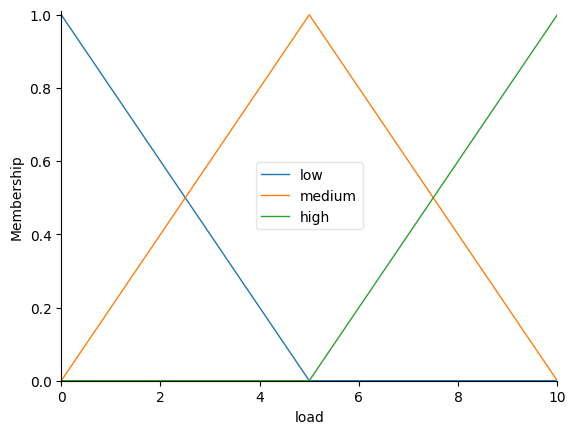

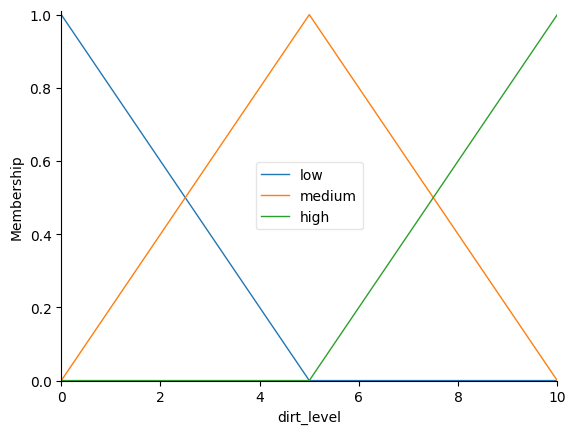

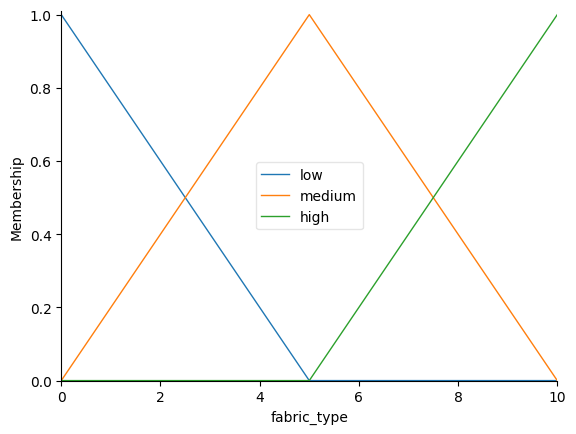

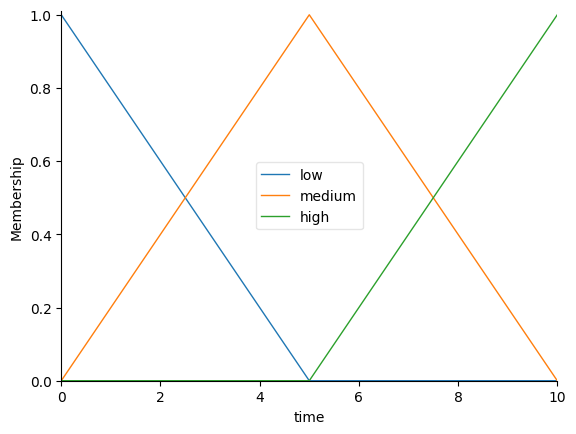

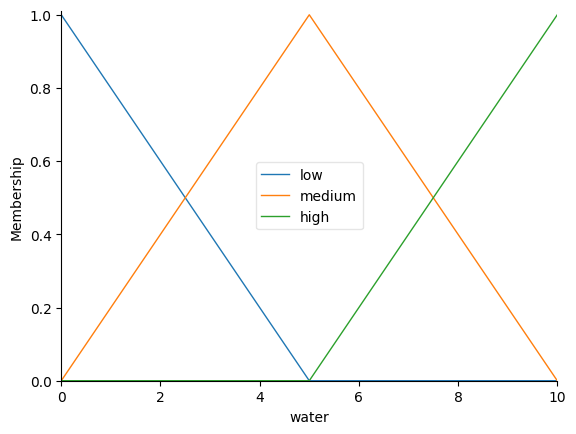

In [4]:
#2.4 May giat
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
load=ctrl.Antecedent(np.arange(0,10.1,0.1),'load')
dirt_level=ctrl.Antecedent(np.arange(0,10.1,0.1),'dirt_level')
fabric_type=ctrl.Antecedent(np.arange(0,10.1,0.1),'fabric_type')
time=ctrl.Consequent(np.arange(0,10.1,0.1),'time')
water=ctrl.Consequent(np.arange(0,10.1,0.1),'water')
load['low']=fuzz.trimf(load.universe,[0,0,5])
load['medium']=fuzz.trimf(load.universe,[0,5,10])
load['high']=fuzz.trimf(load.universe,[5,10,10])
dirt_level['low']=fuzz.trimf(dirt_level.universe,[0,0,5])
dirt_level['medium']=fuzz.trimf(dirt_level.universe,[0,5,10])
dirt_level['high']=fuzz.trimf(dirt_level.universe,[5,10,10])
fabric_type['low']=fuzz.trimf(fabric_type.universe,[0,0,5])
fabric_type['medium']=fuzz.trimf(fabric_type.universe,[0,5,10])
fabric_type['high']=fuzz.trimf(fabric_type.universe,[5,10,10])
time['low']=fuzz.trimf(time.universe,[0,0,5])
time['medium']=fuzz.trimf(time.universe,[0,5,10])
time['high']=fuzz.trimf(time.universe,[5,10,10])
water['low']=fuzz.trimf(water.universe,[0,0,5])
water['medium']=fuzz.trimf(water.universe,[0,5,10])
water['high']=fuzz.trimf(water.universe,[5,10,10])
load.view()
dirt_level.view()
fabric_type.view()
time.view()
water.view()

Time: 5.833333333333333
Water: 5.833333333333333


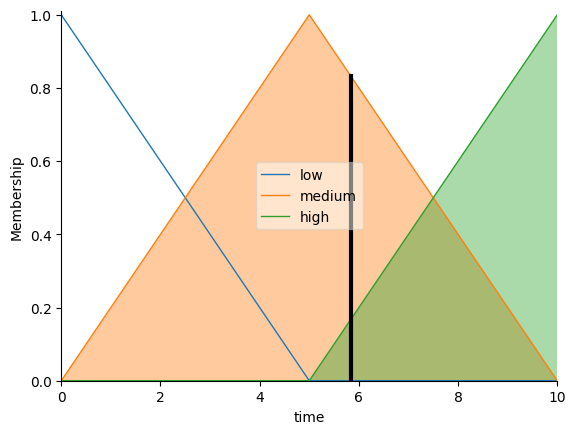

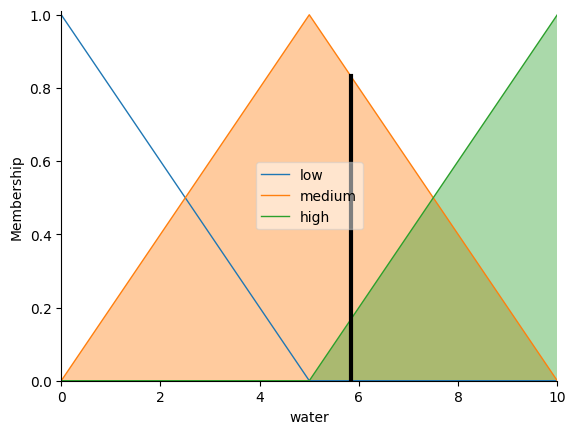

In [8]:
rule1=ctrl.Rule(load['low']|dirt_level['low'],(time['low'],water['low']))
rule2=ctrl.Rule(load['low']|dirt_level['medium'],(time['medium'],water['medium']))
rule3=ctrl.Rule(load['low']|dirt_level['high'],(time['high'],water['medium']))
rule4=ctrl.Rule(load['medium']|dirt_level['low'],(time['medium'],water['medium']))
rule5=ctrl.Rule(load['medium']|dirt_level['medium'],(time['high'],water['medium']))
rule6=ctrl.Rule(load['medium']|dirt_level['high'],(time['high'],water['high']))
rule7=ctrl.Rule(load['high']|dirt_level['low'],(time['medium'],water['high']))
rule8=ctrl.Rule(load['medium']|dirt_level['low'],(time['high'],water['high']))
rule9=ctrl.Rule(load['high']|dirt_level['medium'],(time['high'],water['high']))
rule10=ctrl.Rule(load['high']|dirt_level['high'],(time['high'],water['high']))
rule11=ctrl.Rule(fabric_type['low'],(time['low'],water['low']))
rule12=ctrl.Rule(fabric_type['medium'],(time['medium'],water['medium']))
rule13=ctrl.Rule(fabric_type['high'],(time['high'],water['high']))
rule14=ctrl.Rule(load['high']|dirt_level['high']|fabric_type['high'],(time['high'],water['high']))
rule15=ctrl.Rule(load['low']|dirt_level['low']|fabric_type['low'],(time['low'],water['low']))
rule16=ctrl.Rule(load['medium']|dirt_level['medium']|fabric_type['medium'],(time['medium'],water['medium']))
control_system=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16])
control_sim=ctrl.ControlSystemSimulation(control_system)
control_sim.input['load']=10
control_sim.input['dirt_level']=10
control_sim.input['fabric_type']=10
control_sim.compute()
print(f"Time: {control_sim.output['time']}")
print(f"Water: {control_sim.output['water']}")
time.view(sim=control_sim)
water.view(sim=control_sim)